# Q3

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

## Section 1

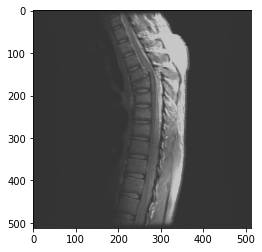

In [2]:
img = cv.imread("./spine.tif", cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray", vmin = 0, vmax = 255)
plt.show()

## Section 2

In [3]:
img.shape, img.dtype, np.min(img), np.max(img)

((512, 512), dtype('uint8'), 51, 199)

In [4]:
def transform(image, transformation, gamma=1):
    minimum, maximum = np.min(image), np.max(image)
    c = 255 ** (1 - gamma)
    T = {
        "linear_stretch": lambda r: np.rint(255.0 * (r - minimum) / (maximum - minimum)),
        "power_law": lambda r: np.rint(c * r ** gamma)
    }
    return T[transformation](image).astype(np.uint8)

## Section 3

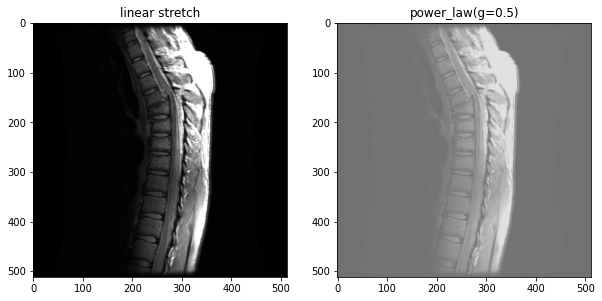

In [5]:
linear_stretch = transform(img, "linear_stretch")
power_law = transform(img, "power_law", gamma=0.5)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(linear_stretch, cmap="gray", vmin = 0, vmax = 255)
ax[0].set_title("linear stretch")
ax[1].imshow(power_law, cmap="gray", vmin = 0, vmax = 255)
ax[1].set_title("power_law(g=0.5)")
plt.show()

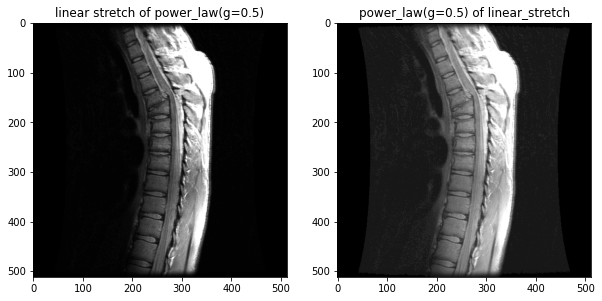

In [6]:
power_law_linear_stretch = transform(linear_stretch, "power_law", gamma=0.5)
linear_stretch_power_law = transform(power_law, "linear_stretch")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(linear_stretch_power_law, cmap="gray", vmin = 0, vmax = 255)
ax[0].set_title("linear stretch of power_law(g=0.5)")
ax[1].imshow(power_law_linear_stretch, cmap="gray", vmin = 0, vmax = 255)
ax[1].set_title("power_law(g=0.5) of linear_stretch")
plt.show()

## Section 4


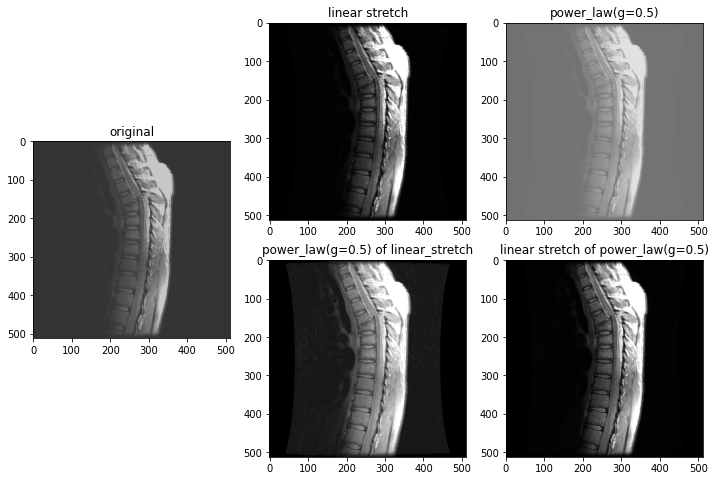

In [7]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
gs = axs[0, 0].get_gridspec()
for ax in axs[:, 0]:
    ax.remove()
originalax = fig.add_subplot(gs[:, 0])

originalax.imshow(img, cmap='gray', vmin = 0, vmax = 255)
originalax.set_title('original')

axs[1,1].imshow(power_law_linear_stretch, cmap='gray', vmin = 0, vmax = 255)
axs[1,1].set_title('power_law(g=0.5) of linear_stretch')

axs[1,2].imshow(linear_stretch_power_law, cmap='gray', vmin = 0, vmax = 255)
axs[1,2].set_title('linear stretch of power_law(g=0.5)')

axs[0,2].imshow(power_law, cmap='gray', vmin = 0, vmax = 255)
axs[0,2].set_title('power_law(g=0.5)')

axs[0,1].imshow(linear_stretch, cmap='gray', vmin = 0, vmax = 255)
axs[0,1].set_title('linear stretch')
plt.show()

## Section 5

#### description in report file

In [8]:
def show(x):
    w = transform(x, "power_law", gamma=0.5)
    u = transform(x, "linear_stretch")
    u = transform(u, "power_law", gamma=0.5)
    w = transform(w, "linear_stretch")
    plt.plot(x, w)
    plt.plot(x, u)
    plt.legend(["linear_stretch of power_law", "power_law of linear_stretch"])
    plt.show()

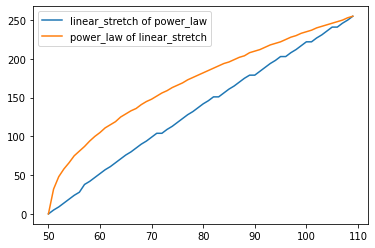

In [9]:
show(np.arange(50, 110))

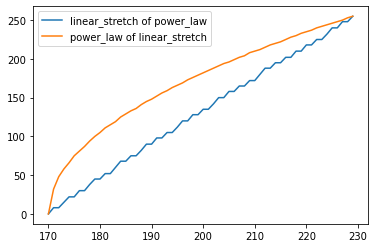

In [10]:
show(np.arange(170, 230))